# 互易和非互易的对比
对比传统的互易和非互易的电池性能

In [43]:
from sympy.solvers.ode.systems import dsolve_system
import sympy as sp
from sympy import diff,dsolve,simplify,Function,I,Equality

In [44]:
a = Function('a')
b = Function('b')
ada = Function('ada')
bdb = Function('bdb')
adb = Function('adb')
omega = sp.Symbol('omega',real=True,positive=True)
omegaL = sp.Symbol('omega_L',real=True,positive=True)
J = sp.Symbol('J',real=False)
Epsilon = sp.Symbol('Epsilon',real=True,positive=True)
kappa_a,kappa_b = sp.symbols('kappa_a,kappa_b',real=True,positive=True)
t = sp.Symbol('t',real=True)

In [45]:
#======================================= 赋值 ==================================
omega_val = 1
omegaL_val= omega_val
J_val = 0.02*omega_val
Epsilon_val = 0.1*omega_val
kappa_val = 0.03*omega_val
def subs_my(sym):
    return sym.subs({
        omega:omega_val,omegaL:omegaL_val,
        J:J_val,Epsilon:Epsilon_val,
        kappa_a:kappa_val,kappa_b:kappa_val
    })

eq1 = diff(a(t),t,1)+(kappa_a/2+I*omega)*a(t)+I*J*b(t)+I*Epsilon*sp.exp(-I*omegaL*t)
eq2 = diff(b(t),t,1)+(kappa_b/2+I*omega)*b(t)+I*sp.conjugate(J)*a(t)

eq1 = subs_my(eq1)
eq2 = subs_my(eq2)

rab = dsolve([eq1,eq2],ics={a(0):0,b(0):0})
ra = rab[0].rhs
rb = rab[1].rhs

# 无法求解
这个为什么求解不出来呀！！！难道是需要用到什么方法吗？肯定是存在一个比较特殊的方法，进行处理之后，就能够很容易的求解出来！！！
按照论文里给的方法是没法直接求解方程的，所以这里利用二次驱动论文中给的方法，我们利用
$$
\langle b^\dagger b\rangle=\langle b^\dagger\rangle \langle b\rangle
$$
论文中的方法之所以求不出来，感觉是因为那一组微分方程组没法消元

In [46]:
ad = Function('ad')
bd = Function('bd')
kappa_a,kappa_b = sp.symbols('kappa_a,kappa_b',real=True,positive=True)
eq2_1 = sp.Equality(diff(ad(t),t,1),(-kappa_a/2+I*omega)*ad(t)+I*sp.conjugate(J)*bd(t)+I*Epsilon*sp.exp(I*omegaL*t))
eq2_2 = sp.Equality(diff(bd(t),t,1),(-kappa_b/2+I*omega)*bd(t)+I*J*ad(t))

eq2_1 = subs_my(eq2_1)
eq2_2 = subs_my(eq2_2)

r2 = dsolve([eq2_1,eq2_2],ics={ad(0):0,bd(0):0})
r2[1].rhs

-(3.2 - 1.77635683940025e-16*I)*exp(1.0*I*t) + (1.6 + 1.2*I)*exp(-t*(0.015 - 0.98*I)) + (1.6 - 1.2*I)*exp(-t*(0.015 - 1.02*I))

In [47]:
rbd = r2[1].rhs
rbdb = rbd*rb
r = simplify(rbdb)

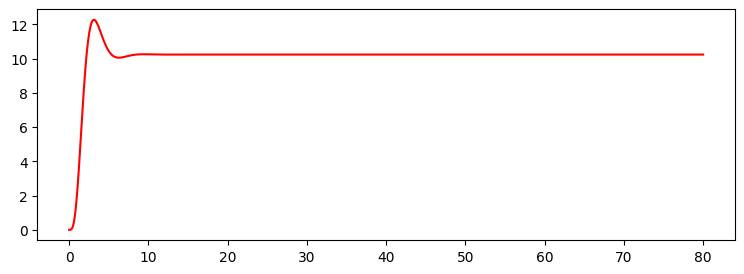

In [48]:
import numpy as np
import matplotlib.pyplot as plt
rf = sp.lambdify(t,r,'numpy')
tlist=np.linspace(0,4000,4000)
rr = rf(tlist)
plt.figure(figsize=(9,3))
plt.plot(tlist*J_val,np.real(rr),'r')
plt.show()